![title](logo_small.png)

# Linear Regression

- In this task we will Predict the percentage of an student based on the number of study hours.

- This is a simple linear  regression task as it involves just 2 variables



###### Let's Read a typical data about students.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the data from csv file 
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot the data in visualize form and try to understand the relation between Hours and Scores of the Students.

Text(0, 0.5, 'Percentage Score')

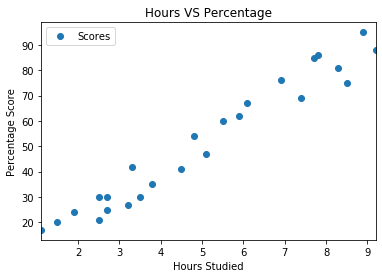

In [3]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours VS Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')


- From the above graph we can see that the relation between the score and hours is linear.

###### Now divide the data into 'X'  inputs  and 'Y' outputs 

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Split the data into trainig and test sets by using the Scikit-Learn's built-in method 

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Finally when we split the data into training and testing sets now we train the model using the trainig set.   

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Now plot the regression line on the graph with the test data.

Text(0, 0.5, 'Percentage Score')

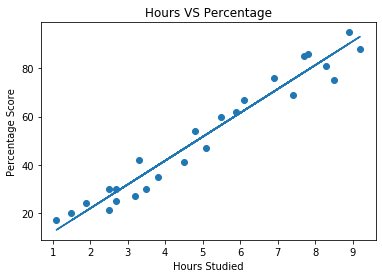

In [7]:
line = regressor.coef_* X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line)
plt.title('Hours VS Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

#### Now predicting the score using the test set of data and compare the actual and predecting values.

In [8]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Evaluating the model using Mean Square Error.

In [9]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


#### Finding the accuracy of Testing data and Training Data.

In [10]:
print("Testing accuracy: " , regressor.score(X_test,y_test)*100)
print("Training accuracy: " , regressor.score(X_train,y_train)*100)

Testing accuracy:  94.54906892105356
Training accuracy:  95.15510725211553


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [11]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("Predicted Score for 9.25 hrs = {}".format(own_pred[0]))

Predicted Score for 9.25 hrs = 93.69173248737538
